<a href="https://colab.research.google.com/github/RD191295/Stock-Market-Prediction-/blob/main/Stock_Market_Prediction_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from pandas_datareader import data as pdr

In [2]:
# let us get data from yahoo finance
yf.pdr_override()
stock_data = pdr.get_data_yahoo("IEX.NS", start="2002-07-01", end="2022-09-26")

[*********************100%***********************]  1 of 1 completed


In [44]:
stock_data = stock_data.reset_index(level=0)
stock_data

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2017-10-23,50.000000,55.333332,50.000000,54.305000,51.381550,100373940
1,1,2017-10-24,53.833332,54.501667,53.174999,53.446667,50.569424,6492840
2,2,2017-10-25,53.333332,53.366665,51.521667,52.101665,49.296833,4222440
3,3,2017-10-26,51.748333,53.000000,51.036667,52.088333,49.284218,2614500
4,4,2017-10-27,52.000000,52.493332,51.703335,52.169998,49.361481,934440
...,...,...,...,...,...,...,...,...
1213,1213,2022-09-19,157.500000,158.199997,152.550003,152.949997,152.949997,7406954
1214,1214,2022-09-20,153.800003,155.399994,152.949997,153.250000,153.250000,5305163
1215,1215,2022-09-21,153.300003,154.550003,150.000000,151.100006,151.100006,7288988
1216,1216,2022-09-22,150.500000,153.199997,150.000000,151.949997,151.949997,5550059


In [4]:
stock_modified_data = stock_data[["Date","Close"]]

In [6]:
stock_modified_data.head()

,Date,Close
0,2017-10-23,54.305000
1,2017-10-24,53.446667
2,2017-10-25,52.101665
3,2017-10-26,52.088333
4,2017-10-27,52.169998


In [7]:
stock_modified_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1218 non-null   datetime64[ns]
 1   Close   1218 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


In [8]:
stock_modified_data.index = stock_modified_data.pop("Date")
stock_modified_data

,Close
Date,
2017-10-23,54.305000
2017-10-24,53.446667
2017-10-25,52.101665
2017-10-26,52.088333
2017-10-27,52.169998
...,...
2022-09-19,152.949997
2022-09-20,153.250000
2022-09-21,151.100006


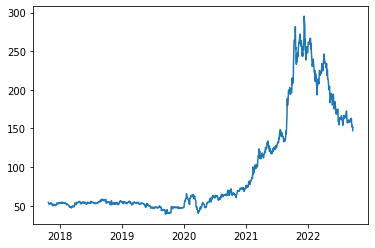

In [9]:
import matplotlib.pyplot as plt

plt.plot(stock_modified_data.index, stock_modified_data["Close"])

In [10]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

In [11]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_stock_data = df_to_windowed_df(stock_modified_data, 
                                '2020-07-05', 
                                '2022-03-23', 
                                n=3)
windowed_stock_data

,Target Date,Target-3,Target-2,Target-1,Target
0,2020-07-05,59.916664,59.950001,61.283333,62.616665
1,2020-07-07,61.283333,62.616665,63.650002,62.866665
2,2020-07-08,62.616665,63.650002,62.866665,62.483334
3,2020-07-09,63.650002,62.866665,62.483334,62.083332
4,2020-07-10,62.866665,62.483334,62.083332,61.766666
...,...,...,...,...,...
424,2022-03-16,225.149994,219.500000,218.600006,222.750000
425,2022-03-17,219.500000,218.600006,222.750000,223.149994
426,2022-03-21,218.600006,222.750000,223.149994,220.949997
427,2022-03-22,222.750000,223.149994,220.949997,221.949997


In [12]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()
  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]

  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1],1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, Y = windowed_df_to_date_X_y(windowed_stock_data)

dates.shape, X.shape, Y.shape

((429,), (429, 3, 1), (429,))

In [13]:
q_80 = int(len(dates) * 0.8)
q_90 = int(len(dates) * 0.9)

dates_train , X_train, Y_train = dates[:q_80], X[:q_80], Y[:q_80]
dates_val , X_val, Y_val = dates[q_80:q_90], X[q_80:q_90], Y[q_80:q_90]
dates_test, X_test, Y_test = dates[q_90:], X[q_90:], Y[q_90:]

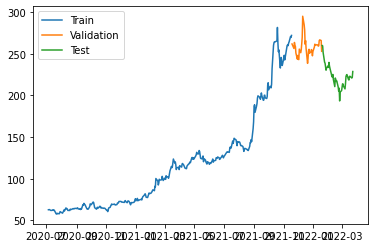

In [14]:
plt.plot(dates_train, Y_train)
plt.plot(dates_val, Y_val)
plt.plot(dates_test, Y_test)

plt.legend(["Train","Validation","Test"])

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(128),
                    layers.Dropout(0.2),
                    layers.Dense(64, activation='relu'),
                    layers.Dropout(0.1),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

In [83]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 128)               66560     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                                 
Total params: 79,041
Trainable params: 79,041
Non-trai

In [88]:
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=20)

Epoch 1/20
11/11 [==============================] - 0s 11ms/step - loss: 108.5197 - mean_absolute_error: 7.5259 - val_loss: 62.1115 - val_mean_absolute_error: 5.9094
Epoch 2/20
11/11 [==============================] - 0s 9ms/step - loss: 88.3482 - mean_absolute_error: 6.5730 - val_loss: 56.4054 - val_mean_absolute_error: 5.2498
Epoch 3/20
11/11 [==============================] - 0s 9ms/step - loss: 121.7261 - mean_absolute_error: 7.6635 - val_loss: 64.5746 - val_mean_absolute_error: 6.0948
Epoch 4/20
11/11 [==============================] - 0s 8ms/step - loss: 94.2591 - mean_absolute_error: 6.9487 - val_loss: 53.4894 - val_mean_absolute_error: 5.1413
Epoch 5/20
11/11 [==============================] - 0s 7ms/step - loss: 106.6492 - mean_absolute_error: 7.2001 - val_loss: 56.3644 - val_mean_absolute_error: 5.3519
Epoch 6/20
11/11 [==============================] - 0s 8ms/step - loss: 101.4406 - mean_absolute_error: 7.2848 - val_loss: 68.5659 - val_mean_absolute_error: 6.4037
Epoch 7/20


In [89]:
train_predictions = model.predict(X_train)
train_predictions.shape

(343, 1)

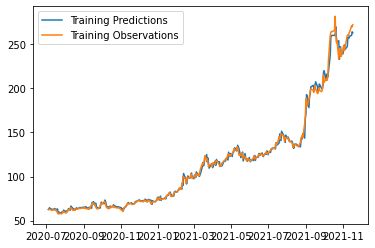

In [90]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, Y_train)
plt.legend(['Training Predictions', 'Training Observations'])

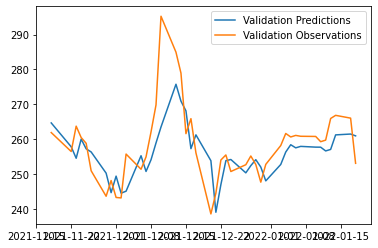

In [91]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, Y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

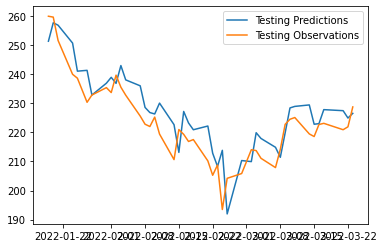

In [92]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, Y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

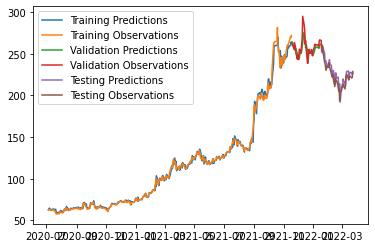

In [93]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, Y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, Y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, Y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [98]:
recursive_predictions = []
recursive_dates = dates_test[-2:]
last_window  = X_test[-1]

for target_date in recursive_dates:
    print(last_window)
    print(target_date)
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    new_window = list(last_window[1:])
    new_window.append(next_prediction)
    new_window = np.array(new_window)
    last_window = new_window
recursive_predictions

[[223.15]
 [220.95]
 [221.95]]
2022-03-22 00:00:00
[[220.95   ]
 [221.95   ]
 [226.59267]]
2022-03-23 00:00:00


[array([226.59267], dtype=float32), array([231.50343], dtype=float32)]